In [1]:
import mysql.connector

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="root"
)
mycursor = mydb.cursor(buffered=True)
##mycursor.execute("CREATE DATABASE scopusdata")
mycursor.execute("USE scopusdata")


In [2]:
import pandas
import csv
# Give the location of the file
df = pandas.read_excel("C:/Users/Gunel/Desktop/WUST study materials/2nd semester/complex systems/KFT.xlsx")
kft=df.values.tolist()
for row in kft:
       print(row)



['prof', 'Wójs', 'Arkadiusz']
['prof', 'Machnikowski', 'Paweł']
['prof', 'Mierzejewski', 'Marcin']
['prof', 'Sznajd-Weron', 'Katarzyna Beata']
['prof', 'Maśka', 'Maciej']
['prof', 'Mituś', 'Antoni Czesław']
['dr ', 'Roszak', 'Katarzyna Ewa']
['dr ', 'Janutka', 'Andrzej']
['dr ', 'Pawlik', 'Grzegorz']
['dr ', 'Sitek', 'Anna Maria']
['dr ', 'Trzmiel', 'Justyna']
['dr ', 'Lewandowski', 'Adrian']
['dr ', 'Sajna', 'Adam']
['dr ', 'Pawłowski', 'Jarosław']
['dr ', 'Karwat', 'Paweł']
['dr ', 'Herbrych', 'Jacek']
['dr ', 'Gawarecki', 'Krzysztof']
['dr ', 'Mielnik-Pyszczorski', 'Adam']
['dr ', 'Łydżba', 'Patrycja']
['dr ', 'Gawełczyk', 'Michał']
['dr ', 'Radosz', 'Wojciech']
['mgr', 'Środa', 'Maksymilian']
['mgr', 'Bieniek', 'Maciej']
['dr', 'Surówka', 'Piotr']
['dr', 'Major', 'Jan']
['PhD', 'Abramiuk', 'Angelika']
['PhD', 'Nowak', 'Bartłomiej']
['PhD', 'Hahn', 'Thilo']
['PhD', 'Groll', 'Daniel']
['PhD', 'Wigger', 'Daniel']
['PhD', 'Krzykowski', 'Mateusz']
['PhD', 'Kawa', 'Karol']
['PhD', 'Środa

In [76]:
col_list = ["Authors","Author(s) ID"]
df_scopus = pandas.read_csv('C:/Users/Gunel/Desktop/WUST study materials/2nd semester/complex systems/scopusb.csv', usecols=col_list)
df_scopus_authors=df_scopus["Authors"]
df_scopus_authors_id=df_scopus["Author(s) ID"]

for row_authors,row_authors_id in zip(df_scopus_authors,df_scopus_authors_id):
    row_authors=row_authors.split(".")
    row_authors_id=row_authors_id.split(";")
    common_paper_rs_list=[]
    count=0
    for  ra,ri in  zip(row_authors,row_authors_id):
        ra=ra.replace(',','')
        ra=ra.replace(' ','')    
        ri=ri.replace(' ','') 
        for row_kft in kft:
                name=row_kft[1]+row_kft[2][0]
                if(ra==name):
                        count=count+1
                        common_paper_rs_list.append((row_kft[0],row_kft[1],row_kft[2],ri))                     
                        break
    if(count<2):
        common_paper_rs_list=[]
    id_list=[]
    if  common_paper_rs_list != []: 
        for cp in common_paper_rs_list:
            mySql_insert_query = """SELECT EXISTS(SELECT id_scopus FROM researchers WHERE id_scopus = "%s""" %  (cp[3])+ """") """
            mycursor.execute(mySql_insert_query )
            mydb.commit()
            int_result= mycursor.fetchone()
            int_result=int(int_result[0])
            if int_result==1:
                    mySql_insert_query ="""SELECT rs_id FROM researchers WHERE id_scopus = %s""" %  (cp[3])
                    mycursor.execute(mySql_insert_query, cp[3])
                    mydb.commit()
                    rs_id= mycursor.fetchone()
                    rs_id=int(rs_id[0])
                    id_list.append(rs_id)
            else :           
                mySql_insert_query = "INSERT INTO researchers (degree,first_name, last_name,id_scopus) VALUES ( %s, %s, %s,%s) "
                mycursor.execute(mySql_insert_query, cp)
                mydb.commit()
                id_list.append(mycursor.lastrowid)
    for i in range(len(id_list)-1):
             for j in range(i+1,len(id_list)):
                    mycursor.execute("INSERT INTO common_paper VALUES(%s,%s)", (int(id_list[i]), int(id_list[j])))
                    mydb.commit()             
        

[1, 2]
[3, 4]
[5, 6, 4]
[5, 6, 4]
[5, 6, 4]
[7, 8, 9]
[7, 8, 9]
[7, 8, 9]
[10, 11, 12]
[10, 11, 12]
[10, 11, 12]
[13, 14, 15]
[13, 14, 15]
[13, 14, 15]
[10, 12]
[14, 4]
[7, 16]
[17, 18]
[4, 6]
[19, 20]
[3, 4]
[11, 21, 12]
[11, 21, 12]
[11, 21, 12]
[8, 7]
[6, 5]
[1, 2]
[5, 6, 4]
[5, 6, 4]
[5, 6, 4]
[1, 2]
[10, 12]
[22, 6, 4]
[22, 6, 4]
[22, 6, 4]
[1, 2]
[23, 24, 20]
[23, 24, 20]
[23, 24, 20]
[16, 20]
[25, 5, 6, 4]
[25, 5, 6, 4]
[25, 5, 6, 4]
[25, 5, 6, 4]
[25, 5, 6, 4]
[25, 5, 6, 4]
[22, 6, 25, 4]
[22, 6, 25, 4]
[22, 6, 25, 4]
[22, 6, 25, 4]
[22, 6, 25, 4]
[22, 6, 25, 4]
[19, 20]
[24, 23, 20]
[24, 23, 20]
[24, 23, 20]
[17, 18]
[25, 26]
[22, 6, 4]
[22, 6, 4]
[22, 6, 4]
[18, 17]
[27, 6, 4]
[27, 6, 4]
[27, 6, 4]
[17, 22, 24, 12]
[17, 22, 24, 12]
[17, 22, 24, 12]
[17, 22, 24, 12]
[17, 22, 24, 12]
[17, 22, 24, 12]
[25, 4]
[5, 25, 4]
[5, 25, 4]
[5, 25, 4]
[19, 20]
[18, 28]
[22, 6, 4]
[22, 6, 4]
[22, 6, 4]
[29, 4]
[6, 4]
[18, 17]
[18, 17]
[30, 20]
[29, 4]
[18, 17]
[18, 17]
[31, 32]
[27, 33]
[3

In [35]:
mySql_insert_query ="""SELECT rs_id,degree, first_name from researchers """
mycursor.execute(mySql_insert_query)
mydb.commit()
node_list= mycursor.fetchall()
print(node_list)
mySql_insert_query ="""SELECT rs_id1, rs_id2 from common_paper """
mycursor.execute(mySql_insert_query)
mydb.commit()
edge_list= mycursor.fetchall()
dr=[node for node in node_list if node[1]=='dr ']
phd=[node for node in node_list if node[1]=='PhD']
prof=[node for node in node_list if node[1]=='prof']
mgr=[node for node in node_list if node[1]=='mgr']

[(1, 'dr ', 'Janutka'), (2, 'PhD', 'Brzuszek'), (3, 'PhD', 'Kawa'), (4, 'prof', 'Machnikowski'), (5, 'PhD', 'Krzykowski'), (6, 'dr ', 'Gawarecki'), (7, 'prof', 'Mierzejewski'), (8, 'mgr', 'Środa'), (9, 'dr ', 'Herbrych'), (10, 'PhD', 'Nowak'), (11, 'PhD', 'Abramiuk'), (12, 'prof', 'Sznajd-Weron'), (13, 'PhD', 'Groll'), (14, 'PhD', 'Wigger'), (15, 'PhD', 'Hahn'), (16, 'PhD', 'Kupczyński'), (17, 'dr ', 'Radosz'), (18, 'dr ', 'Pawlik'), (19, 'PhD', 'Kuśmierz'), (20, 'prof', 'Wójs'), (21, 'dr ', 'Pawłowski'), (22, 'dr ', 'Mielnik-Pyszczorski'), (23, 'mgr', 'Bieniek'), (24, 'PhD', 'Brzezińska'), (25, 'dr ', 'Gawełczyk'), (26, 'dr ', 'Gawarecki'), (27, 'dr ', 'Karwat'), (28, 'dr ', 'Pawlik'), (29, 'dr ', 'Roszak'), (30, 'PhD', 'Bugajny'), (31, 'dr ', 'Gawarecki'), (32, 'prof', 'Machnikowski'), (33, 'dr ', 'Sitek')]
[(1, 2), (3, 4), (5, 6), (5, 4), (6, 4), (7, 8), (7, 9), (8, 9), (10, 11), (10, 12), (11, 12), (13, 14), (13, 15), (14, 15), (10, 12), (14, 4), (7, 16), (17, 18), (4, 6), (19, 20)

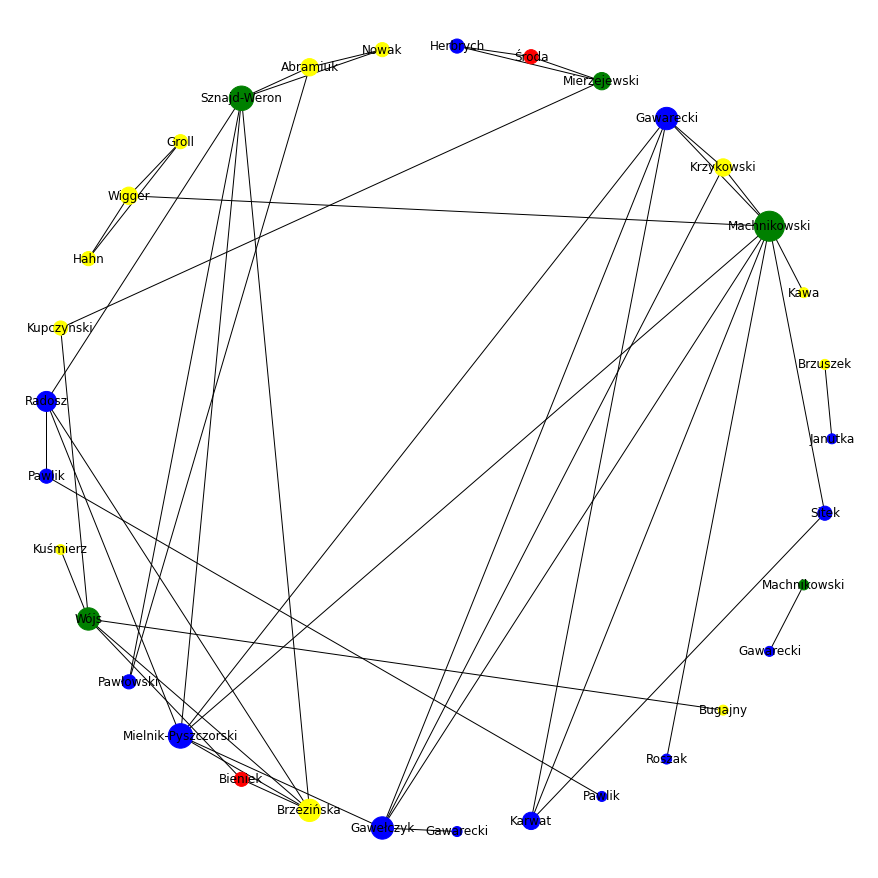

In [101]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

g = nx.Graph()

for  node in node_list:
    if node[1]=='dr ':
        g.add_node(node[0],label=node[2],degree=node[1],color='blue')
    if node[1]=='PhD':
        g.add_node(node[0],label=node[2],degree=node[1],color='yellow')
    if node[1]=='mgr':
        g.add_node(node[0],label=node[2],degree=node[1],color='red')
    if node[1]=='prof':
        g.add_node(node[0],label=node[2],degree=node[1],color='green')
g.add_edges_from(edge_list)

labels=nx.get_node_attributes(g, 'label')
colored_dict = nx.get_node_attributes(g, 'color')
default_color = 'blue'
color_seq = [colored_dict.get(node, default_color) for node in g.nodes()]
pos=nx.spring_layout(g) 

d = dict(g.degree)
plt.figure(3,figsize=(12,12)) 
nx.draw_circular(g, nodelist=d.keys(),labels=labels, with_labels=True,node_color= color_seq,node_size=[v * 100 for v in d.values()])
plt.show()